In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
train = pd.read_csv('my_sign_mnist_train.csv')
test = pd.read_csv('my_sign_mnist_test.csv')

In [4]:
train.sample(5)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
26863     23     169     171     173     175     176     177     178     179   
16390     21     183     184     185     188     189     190     191     190   
12730      2     220     220     219     220     221     220     220     222   
20573     16      70      84      85      90      95     113     131     145   
240       15     118     127     136     144     147     149     153     160   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
26863     179  ...       135       203       205       205       204   
16390     190  ...        75       112       134       123       110   
12730     221  ...       255       255       255       254       254   
20573     151  ...        16         5       172       224       160   
240       165  ...       235       151        96        86        78   

       pixel780  pixel781  pixel782  pixel783  pixel784  
26863       203       202       201       200       198  
16390       109       107       107       109       101  
12730       252       252       250       248       249  
20573        33         0         0         0         0  
240          71        69        69        69        66  

[5 rows x 785 columns]

In [5]:
labels = train['label'].values

In [6]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<Axes: ylabel='count'>

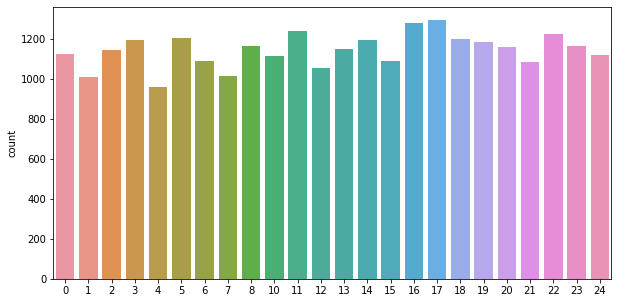

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x=labels)

In [8]:
train.drop('label', axis=1, inplace=True)

In [9]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [10]:
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelBinarizer

label_binarize = LabelBinarizer()
labels = label_binarize.fit_transform(labels)

In [11]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


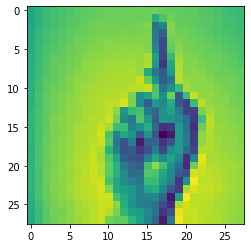

In [12]:
index = 24
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [13]:
import cv2
import numpy as np

for i in range(0,10):
    rand = np.random.randint(0,len(images))
    input_im = images[rand]

    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey

cv2.destroyAllWindows()    

In [14]:
from sklearn.model_selection import train_test_split

x_tarin, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [16]:
x_train = x_tarin / 255
x_test = x_test / 255

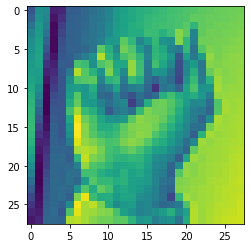

In [17]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size = (3,3), activation = "relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation = "relu"))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [19]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics=["accuracy"])

In [20]:
history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 11s 69ms/step - loss: 2.5181 - accuracy: 0.2188 - val_loss: 1.4971 - val_accuracy: 0.5480
Epoch 2/10
151/151 [==============================] - 10s 68ms/step - loss: 1.1570 - accuracy: 0.6168 - val_loss: 0.7205 - val_accuracy: 0.7692
Epoch 3/10
151/151 [==============================] - 10s 69ms/step - loss: 0.6652 - accuracy: 0.7776 - val_loss: 0.4660 - val_accuracy: 0.8516
Epoch 4/10
151/151 [==============================] - 11s 71ms/step - loss: 0.4199 - accuracy: 0.8601 - val_loss: 0.2673 - val_accuracy: 0.9174
Epoch 5/10
151/151 [==============================] - 11s 70ms/step - loss: 0.2659 - accuracy: 0.9130 - val_loss: 0.1416 - val_accuracy: 0.9610
Epoch 6/10
151/151 [==============================] - 10s 68ms/step - loss: 0.1840 - accuracy: 0.9404 - val_loss: 0.0861 - val_accuracy: 0.9832
Epoch 7/10
151/151 [==============================] - 10s 69ms/step - loss: 0.1208 - accuracy: 0.9634 - val_loss: 0.0537 - val_accuracy:

In [21]:
#model.save("sign_minst_cnn_50_Epochs.h5")

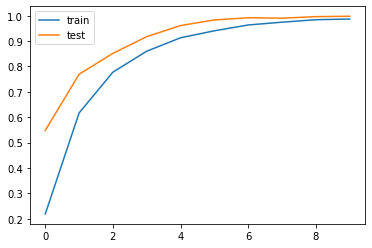

In [22]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(['train','test'])
plt.show()

In [23]:
test_labels = test["label"]
test.drop('label', axis=1, inplace=True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binarize.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())*100

85.12269938650306

In [25]:
def getLetter(result):
  classes_x = np.argmax(result,axis=1)
  classLabels = {0:"A",
                 1:"B",
                 2:"C",
                 3:"D",
                 4:"E",
                 5:"F",
                 6:"G",
                 7:"H",
                 8:"I",
                 9:"K",
                 10:"L",
                 11:"M",
                 12:"N",
                 13:"O",
                 14:"P",
                 15:"Q",
                 16:"R",
                 17:"S",
                 18:"T",
                 19:"U",
                 20:"V",
                 21:"W",
                 22:"X",
                 23:"Y",}
  try:
    res = int(classes_x)
    return classLabels[res]
  except:
    return classes_x

In [ ]:
import cv2
cap = cv2.VideoCapture(0)

while True:
  ret, frame = cap.read()

  frame=cv2.flip(frame, 1)
  
  roi = frame[100:400, 320:620]
  cv2.imshow('roi',roi)
  roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
  roi = cv2.resize(roi, (28,28), interpolation = cv2.INTER_AREA)

  cv2.imshow('roi sacled and gray', roi)
  copy = frame.copy()
  cv2.rectangle(copy, (320, 100), (620,400), (255,0,0), 5)

  roi = roi.reshape(1,28,28,1)

  result = str(model.predict(roi, 1, verbose = 0)[0])
  
  cv2.putText(copy, result, (300, 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
  cv2.imshow("frame", copy)

  if cv2.waitKey(1) == 13:
    break

cap.release()
cv2.destroyAllWindows()    
